# Integrating and Aligning Data and Embeddings - Part 1

This notebook will explore methods aligning data and embeddings. 
In this notebook we will not be traning deep learning models based on multi-modal data, but rather using different representations and embeddings and seeing how we can align or integrate them - either by simply stacking them, or by using different geometric methods such as procrustes alignment. 

## Aligning Diverse Data Types

Another way to align concepts is across their multiple representations and modes of perception  - for example, words have their meaning created through multiple ways. According to distribution semantics, words get their meaning by the company they keep, and the word2vec method uses this as its theoretical motivation

#### Words as semantic content

In [15]:
import gensim

In [5]:
from gensim.models import Word2Vec


In [24]:
import sklearn

In [23]:
import numpy as np

In [6]:
model_address = "/Users/bhargavvader/open_source/comp-syn/GoogleNews-vectors-negative300.bin" 

In [7]:
google_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(model_address, binary=True)

In [8]:
google_w2v_model.most_similar("spoon")

[('spatula', 0.6753253936767578),
 ('spoons', 0.6649504899978638),
 ('pancake_turner', 0.6564604043960571),
 ('ladle', 0.6539714336395264),
 ('wooden_skewer', 0.6503499746322632),
 ('wooden_spatula', 0.6482176780700684),
 ('soup_spoon', 0.6460204124450684),
 ('ramekin', 0.6428078413009644),
 ('metal_spatula', 0.6349596381187439),
 ('slotted_spoon', 0.6332122087478638)]

#### Words as Images and Color

Words have meaning associated to them, and this meaning is formed in many ways. The previous method we saw, word2vec, is based on the notion of "distributional semantics", which means that words get their meaning based on how they are distributed, i.e what kind of words appear around each other. Words like spoon appear around words like spatula and ladle, and maybe lie in a "semantic kitchen", of sorts. But words don't just get their meaning through other words, they also get their meaning through the embodied aspects of human experience, such as vision or sound. 

Work in multi-modal theories of cognition and joint embeddings allow us to represent words using mulitple data sources. The package [comp-syn](https://github.com/comp-syn/comp-syn/) lets us load both average images and color vectors for words.

In [10]:
import compsyn as cs
import PIL
from PIL import Image
import numpy as np

In [11]:
path = "/Users/bhargavvader/open_source/comp-syn/vectors_data/"

In [12]:
disk_vectors = cs.vectors.LoadVectorsFromDisk(path)

In [13]:
disk_vectors.load_colorgram("spoon")

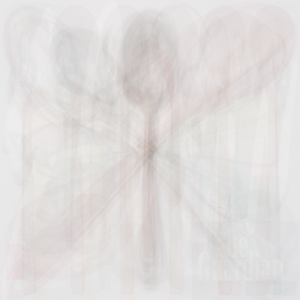

In [14]:
disk_vectors.vectors["spoon"].colorgram

In [15]:
disk_vectors.vectors["spoon"].rgb_dist

[3.9738240445479745e-08,
 1.2427330195609368e-09,
 6.615186550505544e-11,
 7.200046236615882e-10,
 6.0791634523004805e-09,
 3.6344928504957475e-09,
 6.0914932165356215e-09,
 4.248967558145478e-07]

In [16]:
disk_vectors.vectors["spoon"].jzazbz_dist

[1.5443596654454392,
 110.44117960225408,
 0.09030894441112076,
 23.274409875341043,
 0.6444088441605241,
 649.3077159017771,
 7.558348899594023,
 48.892767068044215]

#### Words as seen as images by a CNN

In [17]:
from img2vec_pytorch import Img2Vec


In [18]:
img2vec = Img2Vec()

/Users/bhargavvader/open_source/thinking-with-deep-learning/venv/lib/python3.7/site-packages/torchvision/transforms/transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [19]:
avg_spoon = disk_vectors.vectors["spoon"].colorgram

In [20]:
spoon_img_vec = img2vec.get_vec(avg_spoon)

In [21]:
spoon_img_vec

array([5.14629483e-01, 1.37361616e-01, 9.68453661e-02, 2.44864321e+00,
       3.68885398e-01, 2.12588143e+00, 6.98688924e-02, 2.45071992e-01,
       2.96180248e+00, 5.52304924e-01, 5.19867539e-02, 6.99437484e-02,
       6.97937533e-02, 8.63996863e-01, 9.52431679e-01, 7.30334818e-01,
       0.00000000e+00, 7.87598372e-01, 8.63852680e-01, 1.44910097e-01,
       2.40326114e-02, 5.63538551e-01, 6.59435451e-01, 9.47763771e-03,
       1.20002054e-01, 3.88837941e-02, 2.16037288e-01, 8.71125340e-01,
       2.30171129e-01, 9.55478728e-01, 1.08914399e+00, 2.43684316e+00,
       9.26468492e-01, 6.09005034e-01, 2.80537069e-01, 7.61352777e-01,
       2.68611163e-02, 1.34569064e-01, 2.14975357e+00, 5.47741413e-01,
       2.51136589e+00, 3.05265874e-01, 6.41367063e-02, 6.58354402e-01,
       1.07621551e+00, 3.05058330e-01, 4.48271066e-01, 7.30638206e-02,
       1.17916954e+00, 1.50554419e-01, 1.05346107e+00, 2.49960065e-01,
       8.22983861e-01, 8.43641609e-02, 1.33485603e+00, 0.00000000e+00,
      

## Aligning Similar Data Types Data After Embedding

Aligning similar data types is possible in situations where there are natural oppurtunities of alignment - two examples we will explore in this section are word embedding alignment across time, and word embedding alignment across languages. Note that in this case, we are using only word embeddings, though in principle these alignment methods can extend to situations when the same objects (here they are words) appear in two different settings (here they are times/languages). 

### Cross Temporal Alignment

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic chanage as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf). 

In this case we are training the models ourselves instead of using a pre-trained model, so this might take some time.


In [1]:
# note, this will change to the package x2vec once it is set-up
import lucem_illud


In [4]:
import pandas

In [2]:
import copy

In [3]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists.

In [6]:
ascoDF = pandas.read_csv("../../data/ASCO_abstracts.csv", index_col=0)

In [7]:
ascoDF['tokenized_sents'] = ascoDF['Body'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
ascoDF['normalized_sents'] = ascoDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [16]:
def compareModels(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_sents'].sum())
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [21]:
rawEmbeddings, comparedEmbeddings = compareModels(ascoDF, 'Year')

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [30]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(embeddingsDict[cat][0][word].reshape(1, -1),
                                                                             embed[word].reshape(1, -1))[0,0]))
    return pandas.DataFrame(dists, index = cats)

In [33]:
import matplotlib.pyplot as plt

In [37]:
import seaborn

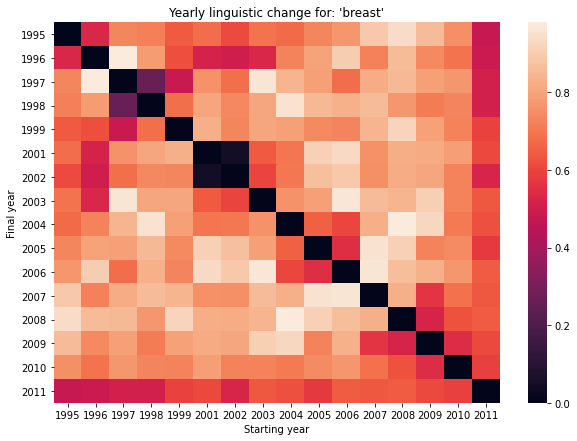

In [38]:
targetWord = 'breast'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

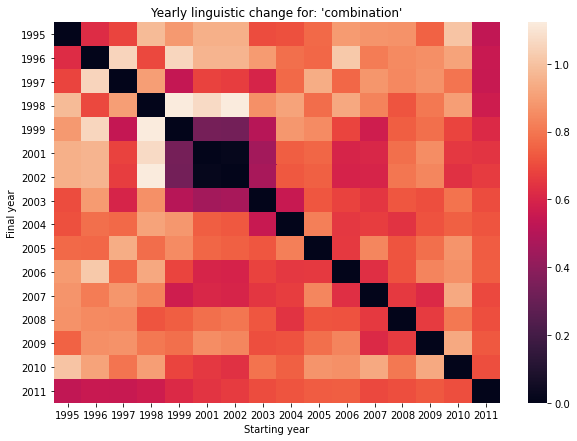

In [39]:
targetWord = 'combination'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [42]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(embeddingsDict[cats[0]][0][word].reshape(1, -1), embed[word].reshape(1, -1))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [43]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 1571 words to compare


In [44]:
wordDivergences[:20]

[('n', 13.744984041899443),
 ('=', 13.272034641355276),
 ('cell', 13.022565657272935),
 ('t', 12.966802518814802),
 ('g', 12.92293006228283),
 ('f', 12.763545628637075),
 ('toxicity', 12.644260884262621),
 ('+', 12.630492084659636),
 ('cm', 12.562005469575524),
 ('vs', 12.477258987724781),
 ('be', 12.445104193408042),
 ('tumor', 12.410499811172485),
 ('increase', 12.369007867760956),
 ('c', 12.366313133388758),
 ('great', 12.357377232983708),
 ('p', 12.310566065832973),
 ('level', 12.222185012884438),
 ('iv', 12.219124028459191),
 ('efficacy', 12.217175044119358),
 ('neutropenia', 12.210966643411666)]

In [45]:
wordDivergences[-20:]

[('answer', 1.72568678855896),
 ('traditional', 1.7196502089500427),
 ('widespread', 1.697782039642334),
 ('particular', 1.6904430985450745),
 ('discuss', 1.639577031135559),
 ('availability', 1.607334554195404),
 ('bias', 1.5886966586112976),
 ('additionally', 1.5632205605506897),
 ('call', 1.51530122756958),
 ('insufficient', 1.5024545788764954),
 ('practical', 1.4983333945274353),
 ('partly', 1.4653775095939636),
 ('simple', 1.4413840174674988),
 ('nature', 1.4131737351417542),
 ('special', 1.353195607662201),
 ('constitute', 1.3465967774391174),
 ('ensure', 1.302788257598877),
 ('uncertain', 1.2419042587280273),
 ('situation', 1.227312982082367),
 ('view', 1.2047664523124695)]

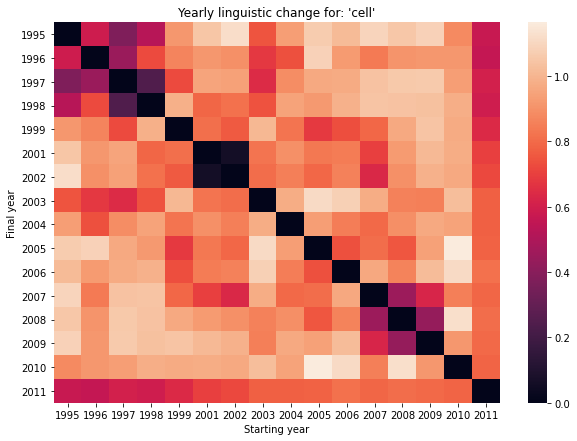

In [46]:
targetWord = wordDivergences[2][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

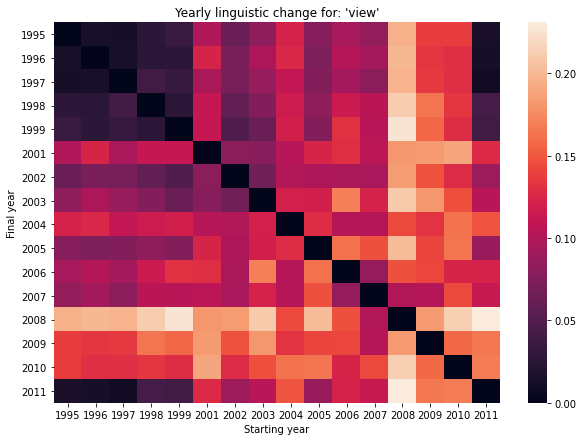

In [47]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

We've seen here from a small, research based corpus how it is still able to capture some notion of semantic drift. The word cell has moved among the most and the word view has moved the least. We recommend trying similar analysis on different datasets to see how words change their meaning over time based on the company they keep. 

### Cross lingual alignment

While in the previous example we saw how we can use a time-stamped textual corpus to create embeddings and then compare between them, in the following example we use pre-trained embeddings for different languages and align them using some powerful packages built for just doing that.

Here, we will use Fast Text word embeddings downloaded from their [documentation website](https://fasttext.cc/), for Spanish and French embeddings.

We then perform an SVD and orthogonal transformation on the data to rotate and reflect it so that it is best aligned. 
The code is adapted from:
https://github.com/babylonhealth/fastText_multilingual

In [14]:
import io

In [15]:
from fasttext import FastVector

In [16]:
fr_dictionary = FastVector(vector_file='../../data/wiki.fr.vec')


reading word vectors from ../../data/wiki.fr.vec


In [17]:
es_dictionary = FastVector(vector_file='../../data/wiki.es.vec')

reading word vectors from ../../data/wiki.es.vec


In [18]:
fr_vector = fr_dictionary["chat"]
es_vector = es_dictionary["gata"]

In [19]:
print(FastVector.cosine_similarity(fr_vector, es_vector))

0.132468378033086


In [20]:
# from https://stackoverflow.com/questions/21030391/how-to-normalize-array-numpy
def normalized(a, axis=-1, order=2):
    """Utility function to normalize the rows of a numpy array."""
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

def make_training_matrices(source_dictionary, target_dictionary, bilingual_dictionary):
    """
    Source and target dictionaries are the FastVector objects of
    source/target languages. bilingual_dictionary is a list of 
    translation pair tuples [(source_word, target_word), ...].
    """
    source_matrix = []
    target_matrix = []

    for (source, target) in bilingual_dictionary:
        if source in source_dictionary and target in target_dictionary:
            source_matrix.append(source_dictionary[source])
            target_matrix.append(target_dictionary[target])

    # return training matrices
    return np.array(source_matrix), np.array(target_matrix)

def learn_transformation(source_matrix, target_matrix, normalize_vectors=True):
    """
    Source and target matrices are numpy arrays, shape
    (dictionary_length, embedding_dimension). These contain paired
    word vectors from the bilingual dictionary.
    """
    # optionally normalize the training vectors
    if normalize_vectors:
        source_matrix = normalized(source_matrix)
        target_matrix = normalized(target_matrix)

    # perform the SVD
    product = np.matmul(source_matrix.transpose(), target_matrix)
    U, s, V = np.linalg.svd(product)

    # return orthogonal transformation which aligns source language to the target
    return np.matmul(U, V)

To align the two word embeddings, we must try and find some common words with similar meanings. Lets try this by simply going through the common dictionaries.

In [21]:
es_words = set(es_dictionary.word2id.keys())
fr_words = set(fr_dictionary.word2id.keys())
overlap = list(es_words & fr_words)
bilingual_dictionary = [(entry, entry) for entry in overlap]

In [27]:
len(bilingual_dictionaryictionary)

475449

In [24]:
# form the training matrices
source_matrix, target_matrix = make_training_matrices(fr_dictionary, es_dictionary, bilingual_dictionary)

In [25]:
# learn and apply the transformation
transform = learn_transformation(source_matrix, target_matrix)
fr_dictionary.apply_transform(transform)

In [26]:
fr_vector = fr_dictionary["chat"]
es_vector = es_dictionary["gata"]
print(FastVector.cosine_similarity(fr_vector, es_vector))

0.27221912097790174


Here, we see just that by picking up words which are spelled the same, we have done a decent job in aligning the two spaces - the Spanish word for cat and French word for cat are closer than they were in the previously unaligned space. Try using an actual Spanish - French dictionary next time and see how well the embeddings end up aligning!